<a href="https://colab.research.google.com/github/keshavub20/tensorflow_nn/blob/main/convolution_nn/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pwd
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_dogs_filtered.zip

/content
--2021-01-06 23:03:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_dogs_filtered.zip’

/tmp/cats_dogs_filt 100%[===================>]  65.43M  23.5MB/s    in 2.8s    

2021-01-06 23:04:00 (23.5 MB/s) - ‘/tmp/cats_dogs_filtered.zip’ saved [68606236/68606236]



**zip data to run train generator**

In [2]:
import os
import zipfile
zip_path='/tmp/cats_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(zip_path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**assign train and validation directory paths**

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_base_dir='/tmp/cats_and_dogs_filtered/train/'
train_cats_dir=os.path.join(train_base_dir,'cats')
train_dogs_dir=os.path.join(train_base_dir,'dogs')
val_base_dir='/tmp/cats_and_dogs_filtered/validation/'
val_cats_dir=os.path.join(val_base_dir,'cats')
val_dogs_dir=os.path.join(val_base_dir,'dogs')
train_gen=ImageDataGenerator(rescale=1/255.0)
test_gen=ImageDataGenerator(rescale=1./255.0)
train_generator=train_gen.flow_from_directory(
    train_base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
test_generator=test_gen.flow_from_directory(
    val_base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Create a model and run**

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['acc'])

history=model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=100,
    validation_data=test_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/10
100/100 - 50s - loss: 0.7090 - acc: 0.5510 - val_loss: 0.6525 - val_acc: 0.6280
Epoch 2/10
100/100 - 49s - loss: 0.6130 - acc: 0.6650 - val_loss: 0.6035 - val_acc: 0.6790
Epoch 3/10
100/100 - 49s - loss: 0.5216 - acc: 0.7440 - val_loss: 0.5941 - val_acc: 0.7080
Epoch 4/10
100/100 - 49s - loss: 0.4557 - acc: 0.7745 - val_loss: 0.5562 - val_acc: 0.7140
Epoch 5/10
100/100 - 49s - loss: 0.3786 - acc: 0.8230 - val_loss: 0.5684 - val_acc: 0.7410
Epoch 6/10
100/100 - 49s - loss: 0.2842 - acc: 0.8770 - val_loss: 0.6687 - val_acc: 0.7410
Epoch 7/10
100/100 - 49s - loss: 0.1811 - acc: 0.9265 - val_loss: 0.7711 - val_acc: 0.7420
Epoch 8/10
100/100 - 49s - loss: 0.1225 - acc: 0.9535 - val_loss: 0.9245 - val_acc: 0.7200
Epoch 9/10
100/100 - 49s - loss: 0.0866 - acc: 0.9730 - val_loss: 0.9829 - val_acc: 0.7260
Epoch 10/10
100/100 - 49s - loss: 0.0509 - acc: 0.9840 - val_loss: 1.3206 - val_acc: 0.7240


**test the model using images**

Saving mut.jpg to mut.jpg
[0.]
mut.jpg is a cat


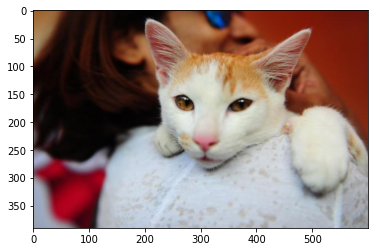

In [38]:
from google.colab import files
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
uploaded=files.upload()
for upd in uploaded.keys():
  path='/content/'+upd
  img=image.load_img(path,target_size=(150,150))
  mat_image=mpimg.imread(os.path.join(path))
  plt.imshow(mat_image)
  im_array=image.img_to_array(img)
  x=np.expand_dims(im_array,0)
  classes=model.predict(x)
  print(classes[0])
  if(classes[0]< 0.5):
    print(upd + ' is a cat')
  else:
    print(upd + ' is a dog')

